In [1]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18328618907754331630
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10606259972905511776
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13070586633515839198
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2404793295560589790
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine


In [2]:
final_review = pd.read_csv("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\final_reviews.csv", index_col = 0)
final_review.head(2)

,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북


In [3]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [4]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x1fa6188b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa6188bb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa6188b040>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa61898280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa61898610>],
 'means': []}

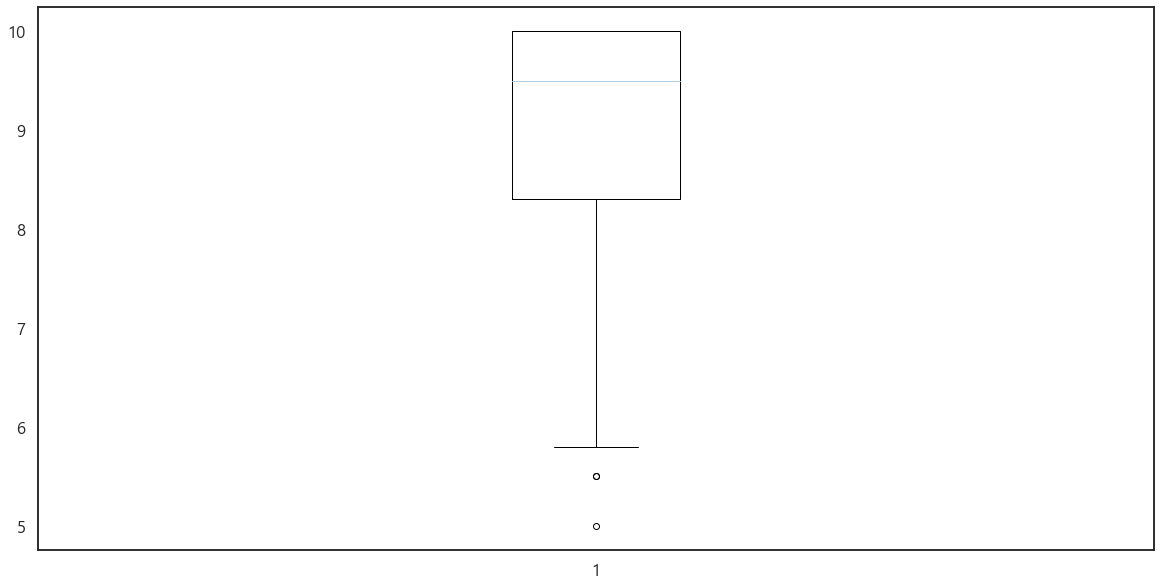

In [5]:
region= df[df['adress'] == '전남']
plt.boxplot(region.stars)

In [6]:
df_more6 = region[region['stars'] > 8.2]
print(df_more6.shape)
df_more6.head()

(114, 4)


,hospital,stars,reviews,adress
19,365차한의원,8.8,다이어트 한약을 받으러 갔어요예전에 여자실장님 있을때 칭찬도 잘 해주시고 좋았는대그...,전남
20,365차한의원,9.0,목에 담이 와서 갔음 친절하셨음 부항뜨고 침맞고 물리치료 함 안한것보다는 백배나았던...,전남
21,365차한의원,10.0,지어진지 얼마 안된 새병원이라 깨끗하고 주말에도 주말 진료가 가능해서 찾아간 병원인...,전남
22,365차한의원,10.0,의사선생님이 생각보다 젊으신분이어서 당황했지만 친절하고 설명도 잘해주셔서 좋았습니다...,전남
23,365차한의원,9.3,통증완화에 좋아요어깨 통증으로 인해 침술 치료를 받았습니다 침술 치료 후 어깨 통증...,전남


In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [9]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_22284/3817455113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews'] = df_more6['reviews'].apply(make_noun)


19    [다이어트, 한약, 예전, 여자, 실장, 때, 칭찬, 해주시, 선생님, 저, 어쨌든...
20    [목, 담, 부항, 침, 물리치료, 함, 백배, 침, 처음, 생각, 봄, 치료, 한...
21    [얼마, 병원, 주말, 주말, 진료, 병원, 간호사, 의사, 선생님, 집, 자주, ...
22    [의사, 선생님, 생각, 신분, 당황, 설명, 유산, 후, 골반, 교정, 치료, 유...
23    [통증, 완화, 어깨, 통증, 침술, 치료, 침술, 치료, 후, 어깨, 통증, 조금...
Name: reviews, dtype: object

In [10]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

C:\Users\yukir\AppData\Local\Temp/ipykernel_22284/853035387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]


19       다이어트 한약 예전 여자 실장 때 칭찬 해주시 선생님 저 어쨌든 약 효과 요요 유지
20         목 담 부항 침 물리치료 함 백배 침 처음 생각 봄 치료 한의원 물리치료 더 거
21              얼마 병원 주말 주말 진료 병원 간호사 의사 선생님 집 자주 이용 병원
22    의사 선생님 생각 신분 당황 설명 유산 후 골반 교정 치료 유산 후 몸 보신 한약 ...
23    통증 완화 어깨 통증 침술 치료 침술 치료 후 어깨 통증 조금 완화 느낌 적 효과 ...
Name: reviews, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=2000, min_df=2, ngram_range=(1, 6))

In [12]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(114, 327)

In [13]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

327


['가게',
 '가격',
 '가라',
 '간호사',
 '간호사 선생님',
 '간호사 원장',
 '간호사 의사',
 '간호사 의사 선생님',
 '감기',
 '감동']

In [14]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

,가게,가격,가라,간호사,간호사 선생님,간호사 원장,간호사 의사,간호사 의사 선생님,감기,감동,갑자기,강력,강력 추천,강추,개선,걱정,건물,검진,결과,경과,계속,골반,곳도,공간,관리,교육,그냥,근육,근육통,근처,금방,금액,기계,기다림,기침,내부,내용,냄새,느낌,느낌 병원,느낌 병원 직원,느낌 효과,다른,다리,다음,다이어트,다이어트 한약,단계,단골,달라,...,친절,침대,침술,카운터,코로나,통증,통증 완화,파스,팔고,팔이,편이,편입,평소,평일,피부,하나,하나 설명,하나 하나,한번,한약,한약 병원,한약 처방,한약 처방 위해,한의사,한의사 선생님,한의원,한의원 방문,한의원 의사,한의원 정말,한의원 찜질,한의원 처음,한의원 치료,할머니,할머니 할아버지,할아버지,항상,항상 사람,항상 자주,해당,해주시,허리,허리 병원,허리 통증,호전,화장실,확인,환경,환자,환자 항상,효과
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.36776,0.392033,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262058,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262058
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.281189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.142363,0.0,0.0,0.241737,0.241737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.338399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241136,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173408,0.0,0.0,0.0,0.203813,0.0,0.0,0.146819,0.0,0.0,0.203813,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.382387,0.0,0.0,0.440458,0.191194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136241


In [15]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 327)


In [16]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
치료,9.352278
진료,7.370734
병원,6.997399
설명,5.957780
한의원,5.700940
...,...
보약,1.044202
침술,1.029793
비용,1.019297
의사 간호사,1.019035


In [17]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
322,확인,0.439493
323,환경,0.791630
324,환자,1.126711
325,환자 항상,0.487182
326,효과,3.047890


In [18]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(327, 2)
(327, 2)


In [19]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
263,치료,9.352278
235,진료,7.370734
84,병원,6.997399
122,설명,5.957780
302,한의원,5.700940
76,방문,5.569463
116,선생님,5.522260
69,물리치료,5.164579
3,간호사,5.155923
176,의사,5.124908


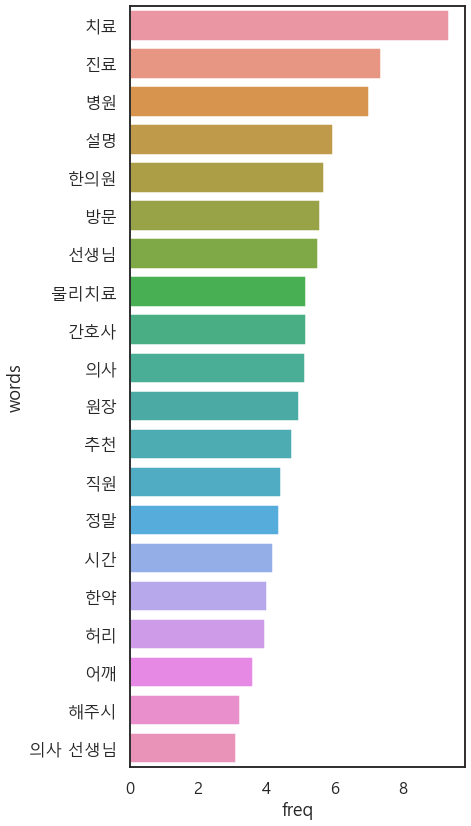

In [20]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,14))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [21]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

In [22]:
words_clean

[('치료', 0),
 ('진료', 1),
 ('병원', 0),
 ('설명', 5),
 ('한의원', 1),
 ('방문', 0),
 ('선생님', 0),
 ('물리치료', 0),
 ('간호사', 0),
 ('의사', 0),
 ('원장', 0),
 ('추천', 0),
 ('직원', 0),
 ('정말', 0),
 ('시간', 0),
 ('한약', 0),
 ('허리', 1),
 ('어깨', 0),
 ('해주시', 0),
 ('의사 선생님', 0),
 ('효과', 1),
 ('사람', 1),
 ('자주', 0),
 ('통증', 1),
 ('조금', 1),
 ('하나', 0),
 ('처음', 0),
 ('생각', 2),
 ('정도', 0),
 ('대기', 0),
 ('근육', 1),
 ('항상', 0),
 ('시설', 0),
 ('느낌', 0),
 ('증상', 1),
 ('분위기', 0),
 ('부항', 0),
 ('추나', 1),
 ('발목', 2),
 ('건물', 0),
 ('상담', 0),
 ('매우', 0),
 ('진료 치료', 0),
 ('찜질', 1),
 ('공간', 0),
 ('주차', 1),
 ('예약', 0),
 ('모두', 0),
 ('계속', 0),
 ('직접', 0),
 ('운동', 0),
 ('대해', 2),
 ('처방', 1),
 ('부위', 0),
 ('보고', 1),
 ('침대', 0),
 ('원장 선생님', 0),
 ('도수', 1),
 ('도수 치료', 1),
 ('주변', 1),
 ('허리 병원', 0),
 ('이용', 1),
 ('정형외과', 0),
 ('코로나', 1),
 ('완화', 1),
 ('지인', 0),
 ('유산', 0),
 ('부분', 1),
 ('다리', 0),
 ('상태', 5),
 ('말씀', 0),
 ('평소', 0),
 ('삐끗', 0),
 ('가격', 0),
 ('금방', 0),
 ('손목', 1),
 ('다이어트', 5),
 ('치료 치료', 0),
 ('기침', 0),
 ('동네', 0),
 ('부황', 

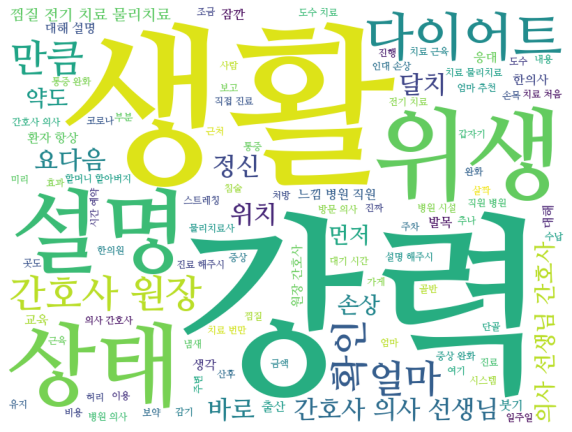

In [24]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
for i in region.reviews:
    if '처럼' in i:
        print('-', i)

## **FOR**

In [ ]:
j = 0

del_list = []

for num, i in enumerate(words_clean):
    if '가격' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
print(j)
print(len(del_list))       

53 ('가격', 5)
598 ('다만 가격', 4)
639 ('가격 한의원', 82)
922 ('진료 가격', 4)
95
4


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '불친절' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
4


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '의사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

9 ('의사', 209)
15 ('의사 선생님', 131)
58 ('한의사', 30)
81 ('방문 의사', 32)
145 ('한의사 선생님', 101)
251 ('의사 선생님 설명', 126)
367 ('의사 선생님 진료', 615)
368 ('방문 의사 선생님', 32)
420 ('의사 선생님 간호사', 90)
465 ('직원 의사', 26)
509 ('진료 의사', 464)
527 ('한의원 의사', 26)
572 ('간호사 의사', 25)
615 ('치료 의사', 40)
617 ('한의원 의사 선생님', 66)
618 ('의사 간호사', 52)
624 ('진료 의사 선생님', 25)
687 ('병원 의사', 57)
726 ('의사 선생님 직원', 56)
728 ('의사 선생님 매우', 54)
750 ('의사 설명', 26)
781 ('선생님 의사', 29)
819 ('의사 진료', 43)
821 ('직원 의사 선생님', 28)
824 ('의사 선생님 치료', 5018)
833 ('치료 의사 선생님', 131)
849 ('선생님 의사 선생님', 39)
895 ('병원 의사 선생님', 49)
907 ('의사 선생님 간호사 선생님', 25)
976 ('의사 선생님 정말', 30)
7675
34


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '간호사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

18 ('간호사', 943)
117 ('간호사 선생님', 33)
258 ('선생님 간호사', 36)
420 ('의사 선생님 간호사', 90)
430 ('간호사 모두', 51)
442 ('원장 간호사', 43)
572 ('간호사 의사', 25)
618 ('의사 간호사', 52)
623 ('선생님 간호사 선생님', 113)
729 ('간호사 선생님 모두', 25)
831 ('병원 간호사', 38)
855 ('간호사 원장', 50)
876 ('치료 간호사', 30)
903 ('진료 간호사', 143)
907 ('의사 선생님 간호사 선생님', 25)
919 ('설명 간호사', 34)
928 ('데스크 간호사', 27)
1758
51


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '다이어트' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

50 ('다이어트', 205)
230 ('다이어트 한약', 128)
333
53


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

19 ('대기', 60)
62 ('대기 시간', 61)
310 ('대기실', 40)
506 ('예약 대기', 32)
583 ('진료 대기', 39)
636 ('방문 대기', 39)
755 ('사람 대기', 117)
773 ('시간 대기', 314)
830 ('대기 바로', 35)
737
62


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '도수' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

89 ('도수', 61)
104 ('도수 치료', 296)
357
64


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '한의원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

2 ('한의원', 25)
98 ('한의원 방문', 35)
139 ('다른 한의원', 427)
234 ('근처 한의원', 56)
257 ('동네 한의원', 300)
264 ('한의원 치료', 36)
302 ('한의원 원장', 65)
313 ('방문 한의원', 26)
338 ('한의원 진료', 39)
364 ('한의원 여기', 27)
435 ('한의원 처음', 50)
466 ('치료 한의원', 35)
472 ('한의원 추천', 32)
526 ('진료 한의원', 784)
527 ('한의원 의사', 26)
564 ('추천 한의원', 60)
617 ('한의원 의사 선생님', 66)
627 ('통증 한의원', 28)
642 ('정형외과 한의원', 127)
643 ('자주 한의원', 486)
699 ('한의원 한의원', 32)
727 ('한의원 내부', 156)
730 ('한의원 병원', 26)
759 ('주변 한의원', 38)
806 ('한의원 자주', 26)
826 ('한의원 느낌', 28)
828 ('한의원 물리치료', 38)
846 ('한의원 가장', 75)
850 ('회사 근처 한의원', 29)
865 ('한의원 검색', 42)
867 ('한의원 선생님', 30)
874 ('한의원 정말', 70)
882 ('효과 한의원', 130)
884 ('한의원 효과', 76)
888 ('한의원 허리', 47)
890 ('한의원 가게', 33)
892 ('여기 한의원', 38)
974 ('전문 한의원', 43)
986 ('일반 한의원', 34)
3721
103


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '물리치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

12 ('물리치료', 43)
196 ('치료 물리치료', 27)
243 ('물리치료 치료', 34)
444 ('진료 물리치료', 30)
535 ('찜질 물리치료', 125)
600 ('물리치료 부항', 33)
630 ('물리치료사', 27)
712 ('물리치료 부황', 24)
735 ('물리치료 찜질', 31)
744 ('설명 물리치료', 41)
751 ('방문 물리치료', 35)
828 ('한의원 물리치료', 38)
924 ('물리치료 선생님', 48)
935 ('물리치료 해주시', 33)
954 ('물리치료 시간', 48)
617
118


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '병원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

5 ('병원', 37)
158 ('병원 내부', 49)
242 ('병원 시설', 40)
277 ('병원 방문', 77)
314 ('방문 병원', 176)
328 ('다른 병원', 253)
358 ('병원 직원', 51)
390 ('진료 병원', 27)
394 ('병원 진료', 33)
415 ('치료 병원', 64)
470 ('직원 병원', 367)
530 ('병원 치료', 68)
534 ('추천 병원', 92)
555 ('병원 원장', 205)
585 ('병원 자체', 61)
628 ('설명 병원', 26)
657 ('병원 분위기', 39)
687 ('병원 의사', 57)
689 ('시간 병원', 118)
730 ('한의원 병원', 26)
823 ('병원 병원', 40)
831 ('병원 간호사', 38)
875 ('동네 병원', 28)
895 ('병원 의사 선생님', 49)
898 ('자생 병원', 57)
960 ('근처 병원', 388)
972 ('선생님 병원', 43)
984 ('병원 위치', 44)
985 ('병원 생각', 698)
3251
147


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '시간' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

8 ('시간', 30)
62 ('대기 시간', 61)
199 ('점심시간', 267)
225 ('진료 시간', 60)
307 ('치료 시간', 138)
320 ('시간 진료', 435)
381 ('예약 시간', 36)
440 ('시간 조금', 38)
508 ('시간 거의', 26)
511 ('시간 시간', 27)
517 ('시간 치료', 41)
573 ('시간 정도', 44)
613 ('방문 시간', 49)
614 ('시간대', 114)
620 ('시간 예약', 106)
668 ('사람 시간', 74)
689 ('시간 병원', 118)
706 ('시간 바로', 168)
715 ('환자 시간', 24)
773 ('시간 대기', 314)
822 ('시간 원장', 55)
829 ('시간 직원', 33)
940 ('직원 시간', 39)
954 ('물리치료 시간', 48)
2345
171


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '예약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

21 ('예약', 33)
381 ('예약 시간', 36)
405 ('예약 방문', 29)
506 ('예약 대기', 32)
620 ('시간 예약', 106)
669 ('방문 예약', 106)
793 ('예약 진료', 45)
814 ('전화 예약', 155)
832 ('예약 예약', 35)
841 ('진료 예약', 32)
880 ('미리 예약', 119)
923 ('예약 가면', 25)
937 ('예약 필수', 71)
824
184


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '주사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

189 ('주사', 156)
156
185


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '증상' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

36 ('증상', 117)
337 ('증상 대해', 71)
634 ('선생님 증상', 44)
778 ('증상 호전', 335)
827 ('진료 증상', 69)
912 ('치료 증상', 35)
993 ('증상 대해 설명', 31)
998 ('증상 치료', 78)
780
193


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '직원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

10 ('직원', 33)
152 ('직원 모두', 34)
227 ('데스크 직원', 29)
289 ('원장 직원', 29)
350 ('직원 원장', 71)
358 ('병원 직원', 51)
422 ('선생님 직원', 37)
458 ('직원 매우', 54)
465 ('직원 의사', 26)
470 ('직원 병원', 367)
638 ('치료 직원', 32)
674 ('시설 직원', 105)
701 ('진료 직원', 165)
726 ('의사 선생님 직원', 56)
743 ('방문 직원', 76)
779 ('직원 친절', 47)
821 ('직원 의사 선생님', 28)
829 ('시간 직원', 33)
840 ('내부 직원', 36)
940 ('직원 시간', 39)
941 ('직원 진료', 30)
955 ('직원 선생님', 25)
970 ('설명 직원', 60)
982 ('원장 직원 모두', 54)
1517
217


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '진료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

1 ('진료', 528)
96 ('원장 진료', 140)
106 ('선생님 진료', 32)
172 ('과잉 진료', 94)
183 ('야간 진료', 102)
194 ('진료 치료', 35)
225 ('진료 시간', 60)
255 ('바로 진료', 102)
282 ('방문 진료', 35)
294 ('진료 진료', 25)
320 ('시간 진료', 435)
333 ('진료 내부', 253)
338 ('한의원 진료', 39)
356 ('진료 원장', 49)
367 ('의사 선생님 진료', 615)
383 ('설명 진료', 31)
390 ('진료 병원', 27)
394 ('병원 진료', 33)
437 ('진료 설명', 34)
444 ('진료 물리치료', 30)
504 ('치료 진료', 30)
509 ('진료 의사', 464)
526 ('진료 한의원', 784)
583 ('진료 대기', 39)
616 ('진료 보고', 86)
624 ('진료 의사 선생님', 25)
656 ('진료 방문', 30)
694 ('진료 상담', 76)
701 ('진료 직원', 165)
771 ('원장 선생님 진료', 315)
774 ('처음 진료', 141)
793 ('예약 진료', 45)
819 ('의사 진료', 43)
820 ('진료 생각', 41)
827 ('진료 증상', 69)
837 ('진료 선생님', 62)
839 ('진료 한약', 48)
841 ('진료 예약', 32)
842 ('진료 추나', 31)
844 ('정말 진료', 47)
864 ('일요일 진료', 48)
886 ('진료 퇴근', 53)
903 ('진료 간호사', 143)
941 ('직원 진료', 30)
942 ('진료 매우', 28)
943 ('진료 보시', 75)
946 ('진료 효과', 99)
969 ('세심 진료', 74)
5822
265


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '찜질' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

60 ('찜질', 100)
535 ('찜질 물리치료', 125)
705 ('찜질 치료', 32)
716 ('치료 찜질', 24)
735 ('물리치료 찜질', 31)
312
270


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '처방' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

43 ('처방', 216)
345 ('한약 처방', 32)
248
272


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '처음' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

28 ('처음', 27)
323 ('처음 방문', 26)
435 ('한의원 처음', 50)
596 ('방문 처음', 75)
714 ('치료 처음', 75)
774 ('처음 진료', 141)
394
278


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0 ('치료', 184)
12 ('물리치료', 43)
91 ('추나 치료', 25)
93 ('치료 치료', 159)
104 ('도수 치료', 296)
110 ('치료 효과', 49)
185 ('설명 치료', 115)
194 ('진료 치료', 35)
196 ('치료 물리치료', 27)
243 ('물리치료 치료', 34)
264 ('한의원 치료', 36)
286 ('치료 진행', 28)
303 ('선생님 치료', 48)
307 ('치료 시간', 138)
326 ('방문 치료', 294)
340 ('치료 원장', 281)
355 ('부항 치료', 69)
372 ('치료 결과', 151)
380 ('치료 방법', 53)
393 ('전기 치료', 26)
398 ('치료 위해', 31)
415 ('치료 병원', 64)
418 ('치료 추나', 40)
441 ('치료 방문', 30)
443 ('원장 치료', 58)
444 ('진료 물리치료', 30)
466 ('치료 한의원', 35)
501 ('상담 치료', 32)
503 ('통증 치료', 133)
504 ('치료 진료', 30)
517 ('시간 치료', 41)
521 ('치료 해주시', 74)
524 ('치료 부항', 39)
528 ('부황 치료', 50)
530 ('병원 치료', 68)
531 ('치료 설명', 29)
535 ('찜질 물리치료', 125)
557 ('치료 선생님', 58)
562 ('허리 치료', 139)
575 ('정도 치료', 218)
578 ('치료 허리', 50)
580 ('바로 치료', 87)
600 ('물리치료 부항', 33)
606 ('치료 통증', 65)
615 ('치료 의사', 40)
625 ('치료 대한', 37)
626 ('치료 과정', 67)
630 ('물리치료사', 27)
638 ('치료 직원', 32)
667 ('치료 부황', 196)
679 ('치료 병행', 824)
680 ('치료 대해', 29)
683 ('치료 다른', 36)
705 ('찜질 치료', 32)
712 ('물리

In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '원장' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

6 ('원장', 109)
85 ('원장 선생님', 62)
96 ('원장 진료', 140)
179 ('원장 설명', 25)
238 ('방문 원장', 130)
289 ('원장 직원', 29)
302 ('한의원 원장', 65)
340 ('치료 원장', 281)
350 ('직원 원장', 71)
356 ('진료 원장', 49)
359 ('원장 상담', 24)
426 ('원장 정말', 52)
438 ('여자 원장', 35)
442 ('원장 간호사', 43)
443 ('원장 치료', 58)
474 ('대표 원장', 186)
555 ('병원 원장', 205)
612 ('원장 매우', 39)
661 ('남자 원장', 91)
725 ('원장 직접', 1438)
771 ('원장 선생님 진료', 315)
772 ('원장 환자', 117)
776 ('원장 실력', 45)
792 ('효과 원장', 155)
822 ('시간 원장', 55)
855 ('간호사 원장', 50)
918 ('여기 원장', 386)
980 ('부원장', 33)
982 ('원장 직원 모두', 54)
991 ('일단 원장', 1437)
5779
308


In [ ]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '선생님' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

4 ('선생님', 110)
15 ('의사 선생님', 131)
85 ('원장 선생님', 62)
106 ('선생님 진료', 32)
117 ('간호사 선생님', 33)
122 ('선생님 설명', 83)
145 ('한의사 선생님', 101)
251 ('의사 선생님 설명', 126)
258 ('선생님 간호사', 36)
292 ('선생님 모두', 30)
303 ('선생님 치료', 48)
367 ('의사 선생님 진료', 615)
368 ('방문 의사 선생님', 32)
385 ('선생님 정말', 68)
420 ('의사 선생님 간호사', 90)
422 ('선생님 직원', 37)
455 ('선생님 매우', 62)
481 ('선생님 상담', 136)
557 ('치료 선생님', 58)
568 ('여자 선생님', 223)
617 ('한의원 의사 선생님', 66)
623 ('선생님 간호사 선생님', 113)
624 ('진료 의사 선생님', 25)
634 ('선생님 증상', 44)
655 ('선생님 서도', 64)
675 ('방문 선생님', 166)
726 ('의사 선생님 직원', 56)
728 ('의사 선생님 매우', 54)
729 ('간호사 선생님 모두', 25)
771 ('원장 선생님 진료', 315)
781 ('선생님 의사', 29)
821 ('직원 의사 선생님', 28)
824 ('의사 선생님 치료', 5018)
833 ('치료 의사 선생님', 131)
837 ('진료 선생님', 62)
849 ('선생님 의사 선생님', 39)
867 ('한의원 선생님', 30)
894 ('선생님 환자', 118)
895 ('병원 의사 선생님', 49)
907 ('의사 선생님 간호사 선생님', 25)
924 ('물리치료 선생님', 48)
955 ('직원 선생님', 25)
972 ('선생님 병원', 43)
976 ('의사 선생님 정말', 30)
8716
352


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '한약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

16 ('한약', 24)
230 ('다이어트 한약', 128)
345 ('한약 처방', 32)
523 ('한약 효과', 33)
756 ('한약 복용', 29)
800 ('치료 한약', 64)
839 ('진료 한약', 48)
971 ('한약 치료', 45)
403
360


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '침' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

115 ('침술', 98)
138 ('침대', 76)
271 ('봉침', 70)
412 ('아침', 41)
414 ('기침', 57)
860 ('침술 치료', 224)
566
366


In [ ]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '환자' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

26 ('환자', 60)
715 ('환자 시간', 24)
772 ('원장 환자', 117)
894 ('선생님 환자', 118)
319
370


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '효과' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

11 ('효과', 79)
110 ('치료 효과', 49)
523 ('한약 효과', 33)
723 ('효과 치료', 84)
792 ('효과 원장', 155)
882 ('효과 한의원', 130)
884 ('한의원 효과', 76)
933 ('효과 보지', 30)
946 ('진료 효과', 99)
735
379


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '통증' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

13 ('통증', 126)
88 ('허리 통증', 166)
170 ('어깨 통증', 37)
220 ('통증 방문', 26)
482 ('통증 때문', 179)
503 ('통증 치료', 133)
536 ('통증 부위', 31)
566 ('허리 통증 방문', 25)
570 ('통증 완화', 31)
606 ('치료 통증', 65)
627 ('통증 한의원', 28)
644 ('손목 통증', 68)
737 ('통증 원인', 74)
803 ('어깨 통증 방문', 223)
1212
393


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '상담' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

27 ('상담', 26)
359 ('원장 상담', 24)
481 ('선생님 상담', 136)
501 ('상담 치료', 32)
694 ('진료 상담', 76)
994 ('상담 해주시', 33)
327
399


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '기분' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

69 ('기분', 277)
277
400


In [ ]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '중심' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
400


In [ ]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '자기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

279 ('갑자기', 27)
27
401


In [ ]:
## 내용수정


j =0

for num, i in enumerate(words_clean):
    if '파서' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

665 ('파서', 153)
153
402


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '엄마' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

512 ('엄마', 82)
82
403


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '허름' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
403


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '기도' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

245 ('기도', 25)
25
404


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

19 ('대기', 60)
62 ('대기 시간', 61)
310 ('대기실', 40)
506 ('예약 대기', 32)
583 ('진료 대기', 39)
636 ('방문 대기', 39)
755 ('사람 대기', 117)
773 ('시간 대기', 314)
830 ('대기 바로', 35)
737
413


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '거기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

696 ('거기', 134)
134
414


In [ ]:
del_list = list(map(int, del_list))
new_word_freq = [i for j, i in enumerate(words_clean) if j not in del_list]

In [ ]:
19+67

In [ ]:
adding = ('가격', 24), ('불친절', 21), ('간호사', 41), ('다이어트', 66), ('대기', 86), ('도수', 61), ('물리치료', 59),\
    ('병원', 127), ('시간', 91), ('예약', 54), ('주사', 15), ('증상', 22), ('직원', 44), ('진료', 318),('찜질', 14), ('처방', 29), ('치료', 603),\
        ('의사', 446), ('한약', 62), ('침', 26), ('효과', 74), ('통증', 62), ('상담', 16), ('기분', 22), ('아프다', 78), ('계속', 22), ('엄마', 4),\
            ('허름함', 42)

In [ ]:
print(len(new_word_freq))

In [ ]:
for i in adding:
    new_word_freq.append(i)

In [ ]:
print(len(new_word_freq))

In [ ]:
new_word_freq = sorted(words_clean, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

[('원장 직접', 1438),
 ('불량', 1626),
 ('며칠', 1735),
 ('주로', 2033),
 ('위주', 2316),
 ('손님', 2446),
 ('실장', 2610),
 ('소화', 2877),
 ('마스크', 3091),
 ('의사 선생님 치료', 5018)]

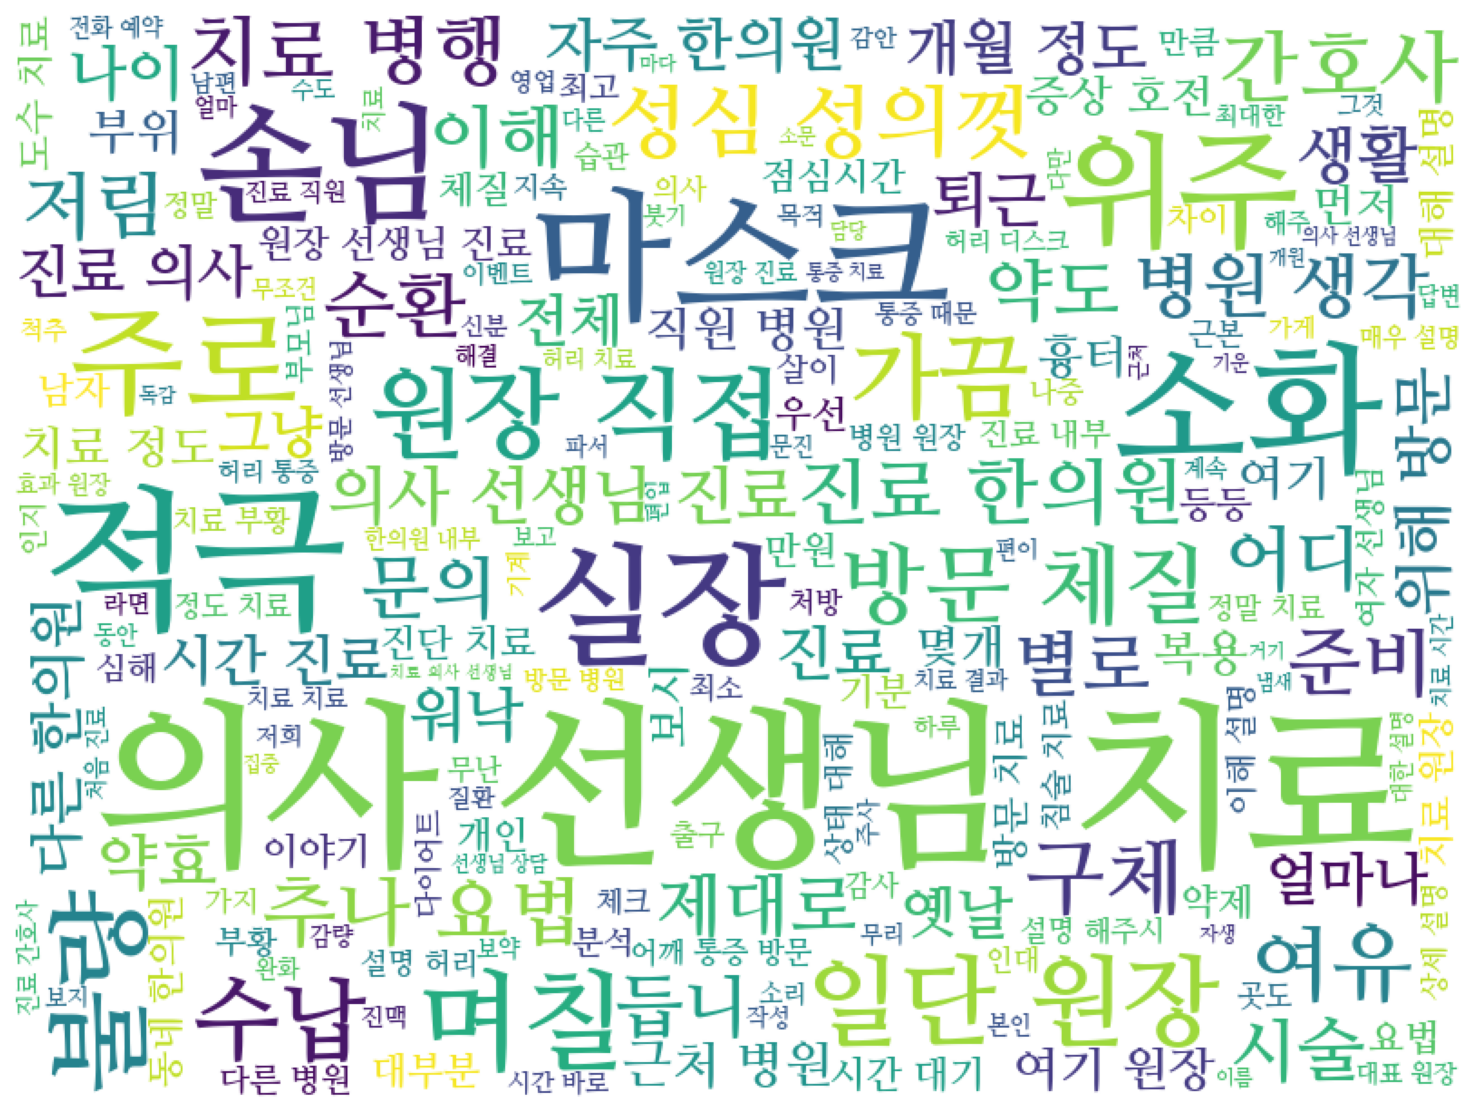

In [ ]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [25]:
for_network.head()

,hospital,stars,reviews,adress
19,365차한의원,8.8,"[다이어트, 한약, 예전, 여자, 실장, 때, 칭찬, 해주시, 선생님, 저, 어쨌든...",전남
20,365차한의원,9.0,"[목, 담, 부항, 침, 물리치료, 함, 백배, 침, 처음, 생각, 봄, 치료, 한...",전남
21,365차한의원,10.0,"[얼마, 병원, 주말, 주말, 진료, 병원, 간호사, 의사, 선생님, 집, 자주, ...",전남
22,365차한의원,10.0,"[의사, 선생님, 생각, 신분, 당황, 설명, 유산, 후, 골반, 교정, 치료, 유...",전남
23,365차한의원,9.3,"[통증, 완화, 어깨, 통증, 침술, 치료, 침술, 치료, 후, 어깨, 통증, 조금...",전남


In [28]:
network_an = []

for i in for_network.reviews:
    if '강력' in i:
        network_an.append(i)
    if '설명' in i :
        network_an.append(i)
    if '위생' in i :
        network_an.append(i)
    if '생활' in i:
        network_an.append(i)
    if '확인' in i:
        network_an.append(i)
    if '삳태' in i:
        network_an.append(i)
    if '다이어트' in i:
        network_an.append(i)
    if '정신' in i:
        network_an.append(i)
    # if '하나' in i:
    #     network_an.append(i)
    # if '설명' in i:
    #     network_an.append(i)
    # if '디스크' in i:
    #     network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(47, 1)


,reviews
0,"[다이어트, 한약, 예전, 여자, 실장, 때, 칭찬, 해주시, 선생님, 저, 어쨌든..."
1,"[의사, 선생님, 생각, 신분, 당황, 설명, 유산, 후, 골반, 교정, 치료, 유..."
2,"[목포, 대표, 방, 병원, 의사, 선생님, 추나, 치료, 효과, 단지, 지속, 효..."
3,"[목포, 대표, 방, 병원, 의사, 선생님, 추나, 치료, 효과, 단지, 지속, 효..."
4,"[무기, 체력, 이름, 한의원, 엄마, 추천, 교통, 선생님, 젠틀, 설명, 질문,..."


In [38]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.06)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.06)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
42,(설명),0.808511,"[((), (설명), 0.8085106382978723, 1.0)]",1
75,(치료),0.446809,"[((), (치료), 0.44680851063829785, 1.0)]",1
41,(선생님),0.382979,"[((), (선생님), 0.3829787234042553, 1.0)]",1
30,(병원),0.361702,"[((), (병원), 0.3617021276595745, 1.0)]",1
367,"(설명, 치료)",0.340426,"[((), (설명, 치료), 0.3404255319148936, 1.0), ((설명...",2


In [48]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
367,"(설명, 치료)",0.340426,"[((), (설명, 치료), 0.3404255319148936, 1.0), ((설명...",2
260,"(설명, 병원)",0.319149,"[((), (병원, 설명), 0.3191489361702128, 1.0), ((병원...",2
321,"(선생님, 설명)",0.319149,"[((), (선생님, 설명), 0.3191489361702128, 1.0), ((선...",2
364,"(진료, 설명)",0.297872,"[((), (진료, 설명), 0.2978723404255319, 1.0), ((설명...",2
373,"(한의원, 설명)",0.234043,"[((), (한의원, 설명), 0.23404255319148937, 1.0), ((...",2


In [49]:
index= []

for num, i in enumerate (df_network['items']):
    if '강력' in i:
        index.append(num)
    if '설명' in i:
        index.append(num)
    if '위생' in i:
        index.append(num)
    if '생활' in i:
        index.append(num)
    # if '설명' in i:
    #     index.append(num)
    if '상태' in i:
        index.append(num)
    if '다이어트' in i:
        index.append(num)
    if '확인' in i:
        index.append(num)
    if '정신' in i:
        index.append(num)
    # if '설명' in i:
    #     index.append(num)
    # if '데스크' in i:
    #     index.append(num)

In [50]:
net_an = df_network.iloc[index]
net_an.head()

,items,support,ordered_statistics,length
367,"(설명, 치료)",0.340426,"[((), (설명, 치료), 0.3404255319148936, 1.0), ((설명...",2
260,"(설명, 병원)",0.319149,"[((), (병원, 설명), 0.3191489361702128, 1.0), ((병원...",2
321,"(선생님, 설명)",0.319149,"[((), (선생님, 설명), 0.3191489361702128, 1.0), ((선...",2
364,"(진료, 설명)",0.297872,"[((), (진료, 설명), 0.2978723404255319, 1.0), ((설명...",2
373,"(한의원, 설명)",0.234043,"[((), (한의원, 설명), 0.23404255319148937, 1.0), ((...",2


In [51]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (net_an['items'])
G.add_edges_from(ar)

In [52]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


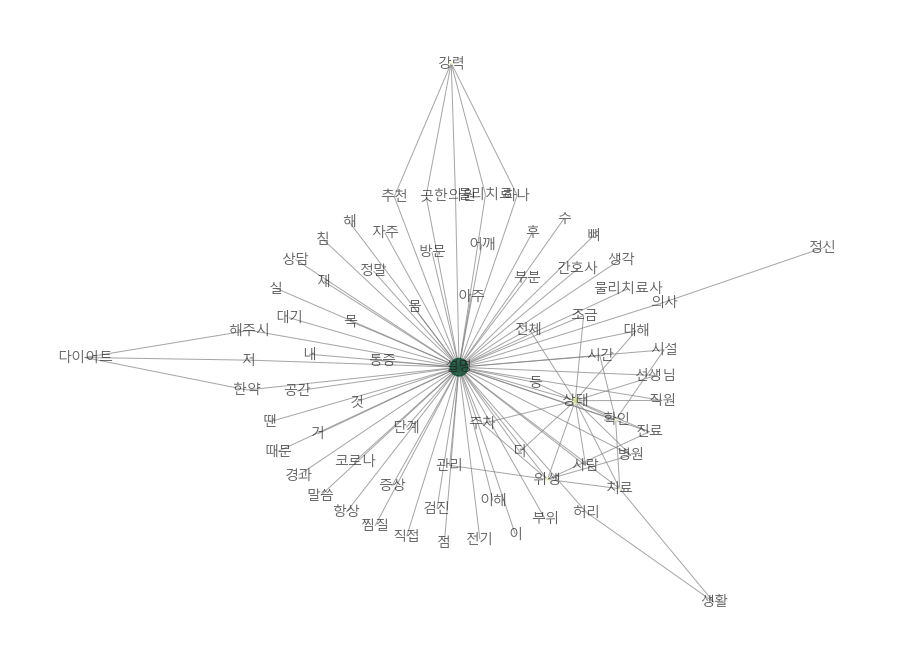

In [53]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

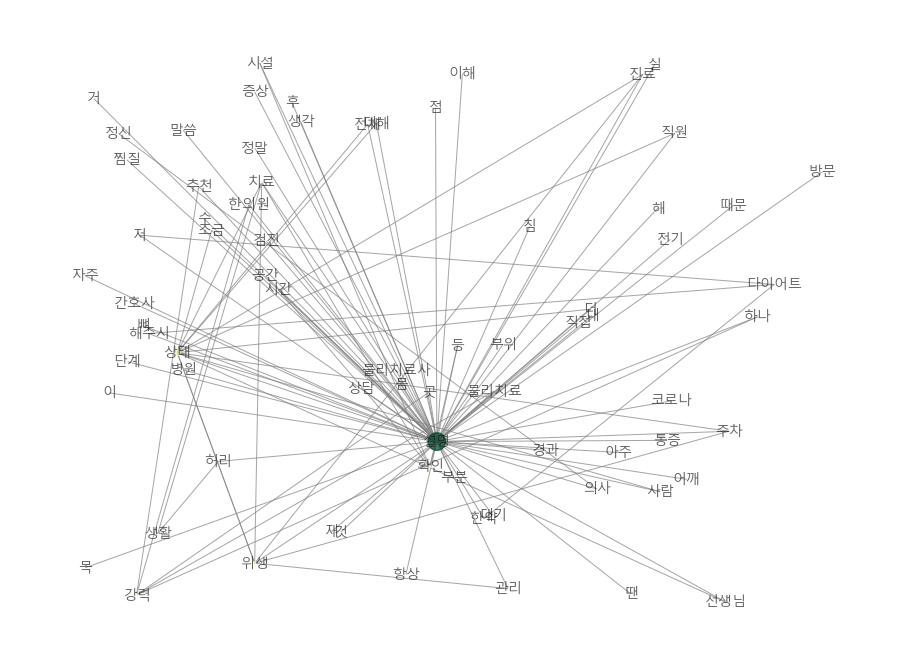

In [54]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

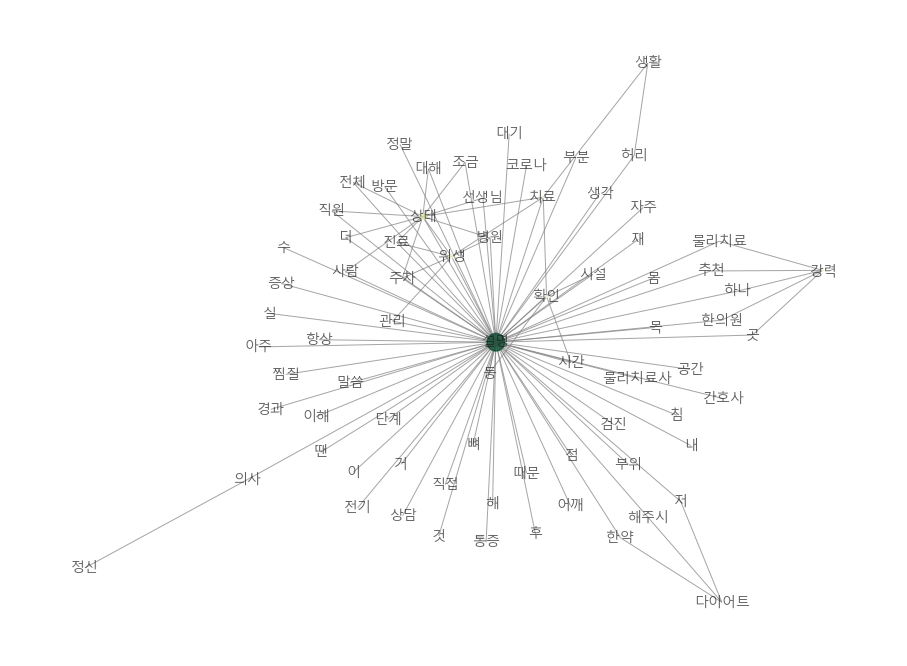

In [55]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

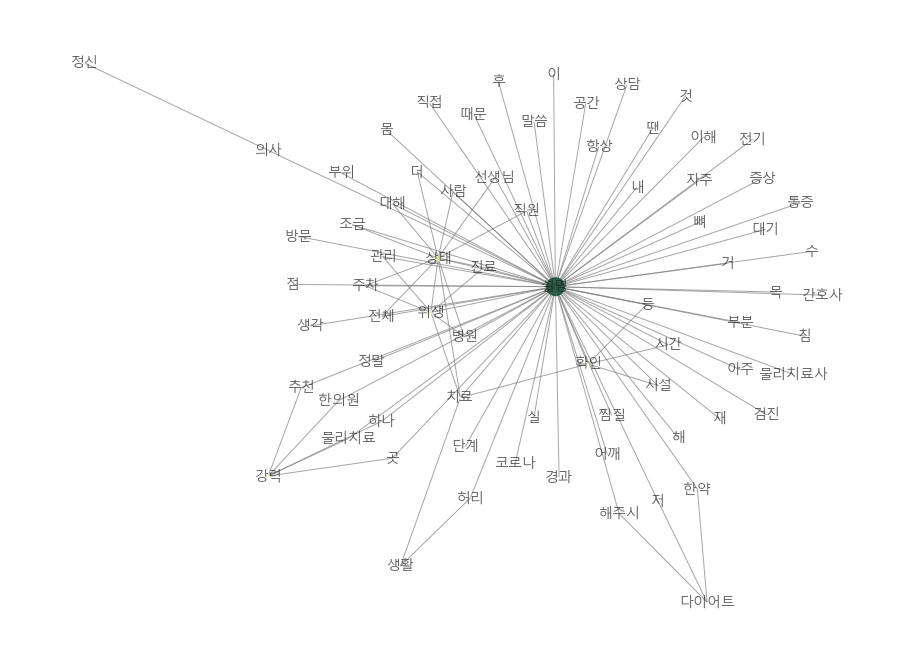

In [56]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)